(-0.999959411406060, -0.999959411406060, 0.00900974696901709, 0.00900974696901709)


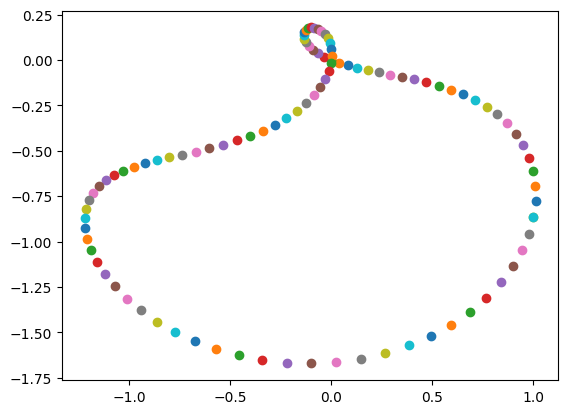

In [65]:
import sympy as sym
import numpy as np
from sympy import *
from numpy import pi, sin, cos, sqrt, absolute, arccos, arctan, sign
import matplotlib.pyplot as plt

l1,l2,l3 = 1,1,1
r,x,y = 1.5,1.5,0
q3 = pi/3
s1,s2= sym.symbols('s1,s2')
c1,c2 = sym.symbols('c1,c2')
xw = x - l3*cos(q3)
yw = y - l3*sin(q3)
eq1 = sym.Eq((xw-l1*c1)**2 + (yw-l1*s1)**2,l2**2)
eq2 = sym.Eq((xw-l2*c2)**2 + (yw-l2*s2)**2,l1**2)
eq3 = sym.Eq(c1**2+s1**2,1)
eq4 = sym.Eq(c2**2+s2**2,1)
result = sym.solve([eq1,eq2,eq3,eq4],s1,s2,c1,c2)
(s1,s2,c1,c2) = result[1]
print(result[0])
q1,q2 = float(asin(s1)),float(asin(s2))
theta = np.linspace(0,2*pi,100)
thetak = np.append(theta[1:100],2*pi)
px,py = r*cos(theta), r*sin(theta)
pxk,pyk = r*cos(thetak), r*sin(thetak)
del_x,del_y = pxk-px,pyk-py
J = Matrix([[-l1*sin(q1), -l2*sin(q2), -l3*sin(q3)],[l1*cos(q1), l2*cos(q2), l3*cos(q3)]])
A = J*np.transpose(J)
qks = [Matrix([q1,q2])] #q3
for i in range (0,len(del_x)):
    #print(Matrix.multiply(A.inv(),Matrix([del_x[i],del_y[i]])))
    qk = qks[i] + Matrix.multiply(A.inv(),Matrix([del_x[i],del_y[i]]))
    #print(qk)
    qks.append(qk)
    #print(l1*cos(float(qk[0]))+l2*cos(float(qk[1]))+l3*cos(float(q3)))
    plt.scatter(l1*cos(float(qk[0]))+l2*cos(float(qk[1])),l1*sin(float(qk[0]))+l2*sin(float(qk[1])))#+l3*cos(float(q3))+l3*sin(q3)
plt.show()

Q2 - Assuming SCARA Robot

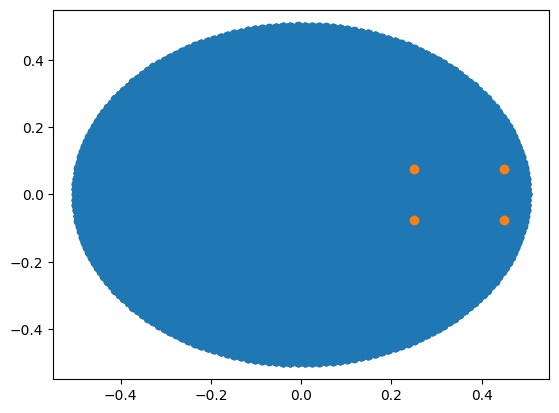

In [4]:
import sympy as sym
import numpy as np
from sympy import *
from numpy import pi, sin, cos, sqrt, absolute, arccos, arctan, sign
import matplotlib.pyplot as plt

l1,l2 = 0.25,0.25
m,mi = 0.8, 0.005
(Ax,Ay,Az),(Bx,By,Bz),(Cx,Cy,Cz),(Dx,Dy,Dz) = (0.45,0.075,0.1),(0.45,-0.075,0.1),(0.25,-0.075,0.1),(0.25,0.075,0.1)
q1 = np.linspace(0,2*pi,100)
q2 = np.linspace(0,2*pi,100)
pxs,pys =[],[]
for i in range(0,100):
    for j in range(0,100):
        px,py = l1*cos(q1[i])+l2*cos(q2[j]),l1*sin(q1[i])+l2*sin(q2[j])
        pxs.append(px)
        pys.append(py)
plt.scatter(pxs,pys)
plt.scatter([Ax,Bx,Cx,Dx],[Ay,By,Cy,Dy])
plt.show()

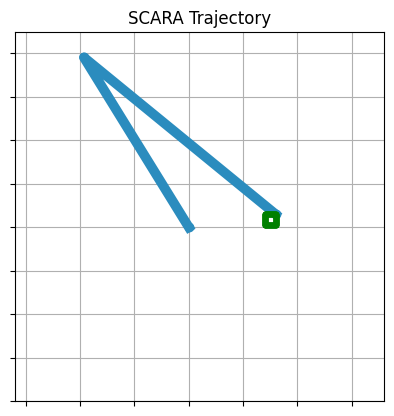

In [41]:
import matplotlib.animation as animation
import sympy as sym
import numpy as np
from sympy import *
from numpy import pi, sin, cos, sqrt, absolute, arccos, arctan, sign

l1,l2 = 0.25,0.25
m,mi = 0.8, 0.005

def get_Inv(x_arr,y_arr):
    s1,s2,s3 = sym.symbols('s1,s2,s3')
    c1,c2,c3 = sym.symbols('c1,c2,c3')
    q1s,q2s = [],[]
    x1_arr,y1_arr = [],[]
    for i in range(0,len(x_arr)):
        eq1 = sym.Eq(l1*c1+l2*c2,x_arr[i])
        eq2 = sym.Eq(l1*s1+l2*s2,y_arr[i])
        eq3 = sym.Eq(c1**2+s1**2,1)
        eq4 = sym.Eq(c2**2+s2**2,1)
        res = sym.solve([eq1,eq2,eq3,eq4],s1,s2,c1,c2)
        [res1,res2] = res
        (s11,s22,c11,c22) = res1
        q1s.append(atan(s11/c11))
        q2s.append(atan(s22/c22))
        x1_arr.append(l1*cos(float(atan(s11/c11))))
        y1_arr.append(l1*sin(float(atan(s22/c22))))
    return (q1s,q2s)

#Linear interpolation
side1x = [0.40]*50
#print(side1x)
side1y = np.linspace(0.06,0.01,50).tolist()
#print(side1y)
side2x = np.linspace(0.40,0.35,50).tolist()
side2y = [0.01]*50
side3x = [0.35]*50
side3y = np.linspace(0.01,0.06,50).tolist()
side4x = np.linspace(0.35,0.40,50).tolist()
side4y = [0.06]*50
sides = [(side1x,side1y),(side2x,side2y),(side3x,side3y),(side4x,side4y)]

x2_arr =[]
y2_arr = []
x1_arr,y1_arr =[],[]
for side in sides:
    x,y = side[0],side[1]
    #print(side[1])
    x2_arr= x2_arr + x
    y2_arr= y2_arr + y
    #Inv Kinematics 
    q1s,q2s = get_Inv(x,y)
    x1_arr = x1_arr + q1s
    y1_arr = y1_arr + q2s

# print(x1_arr)
# print(x2_arr)
fig = plt.figure()
ax = fig.add_subplot(
    111, aspect="equal", autoscale_on=False, xlim=(-0.8, 0.9), ylim=(-0.8, 0.9)
)
ax.grid(alpha=1)
ax.set_title("SCARA Trajectory")
ax.set_xticklabels([])
ax.set_yticklabels([])
(line, ) = ax.plot(
    [], [], "o-", lw=7, color="#2b8cbe"
) 
(line2, ) = ax.plot(
    [], [], ".", lw=2, color='green'
) 
# initialization function
def init():
    line.set_data([], [])
    return (line,)

path_x,path_y = [x2_arr[1]],[y2_arr[1]]

# animation function
def animate(i):
    x_points = [0, x1_arr[i], x2_arr[i]]
    y_points = [0, y1_arr[i], y2_arr[i]]
    path_x.append(x2_arr[i])
    path_y.append(y2_arr[i])
    line.set_data(x_points, y_points)
    line2.set_data(path_x,path_y)
    
    return (line,line2,)#line2
ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames=len(x1_arr)-1, interval=40, blit=True, repeat=False
)
## to save animation, uncomment the line below. Ensure ffmpeg is installed:
ani.save('Trajectory_SCARA.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

# show the animation
plt.show()
